In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans , AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram , linkage
import seaborn as sns

# load Data

In [2]:
df = pd.read_csv('..\\data\\heart_disease.csv')
df.head()

,PC1,PC5,PC6,PC10,PC7,PC9,PC12,PC13,PC8,num
0,-0.017550,0.292001,0.746005,-0.343690,-0.727584,0.184558,0.350511,0.598685,-0.910318,0
1,-1.134815,0.174615,0.095826,0.239566,0.764537,-0.343816,-0.552569,-0.677350,-0.511039,1
2,-1.865945,0.059297,-0.125068,0.854383,-0.099045,-0.041109,0.011509,0.022689,-0.030261,1
3,0.897661,0.388291,0.411199,0.125395,0.406543,-0.521288,-0.390647,-0.211833,-0.039662,0
4,1.314315,0.308332,-0.268851,0.029966,-0.274715,0.800398,-0.180443,0.074683,0.190862,0


In [3]:
y= df['num']
x= df.drop('num',axis=1)

#  K-Means Clustering

## elbow method to determine K

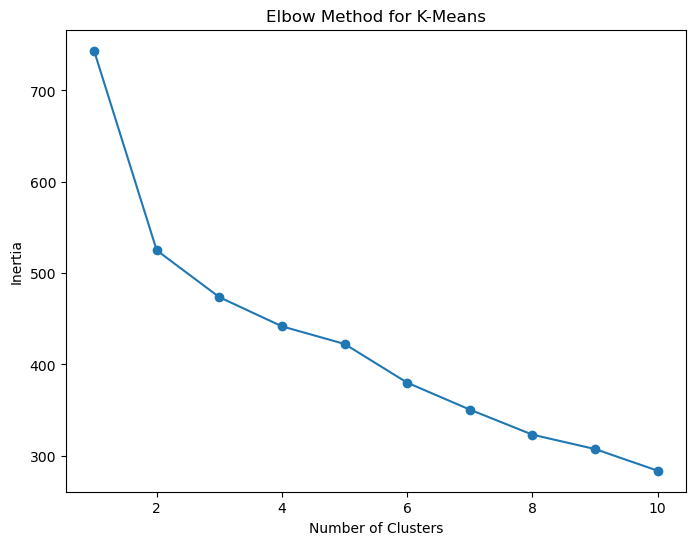

In [4]:
inertia =[]
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,random_state=42)
    kmeans.fit(x)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(range(1,11),inertia, marker= 'o')
plt.title('Elbow Method for K-Means')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


In [5]:
kmeans = KMeans(n_clusters=2, random_state=42)
df['kmeans_cluster'] = kmeans.fit_predict(x)
print("K-Means Silhouette Score:", silhouette_score(x, df['kmeans_cluster']))

K-Means Silhouette Score: 0.2661940499386487


#  Hierarchical Clustering

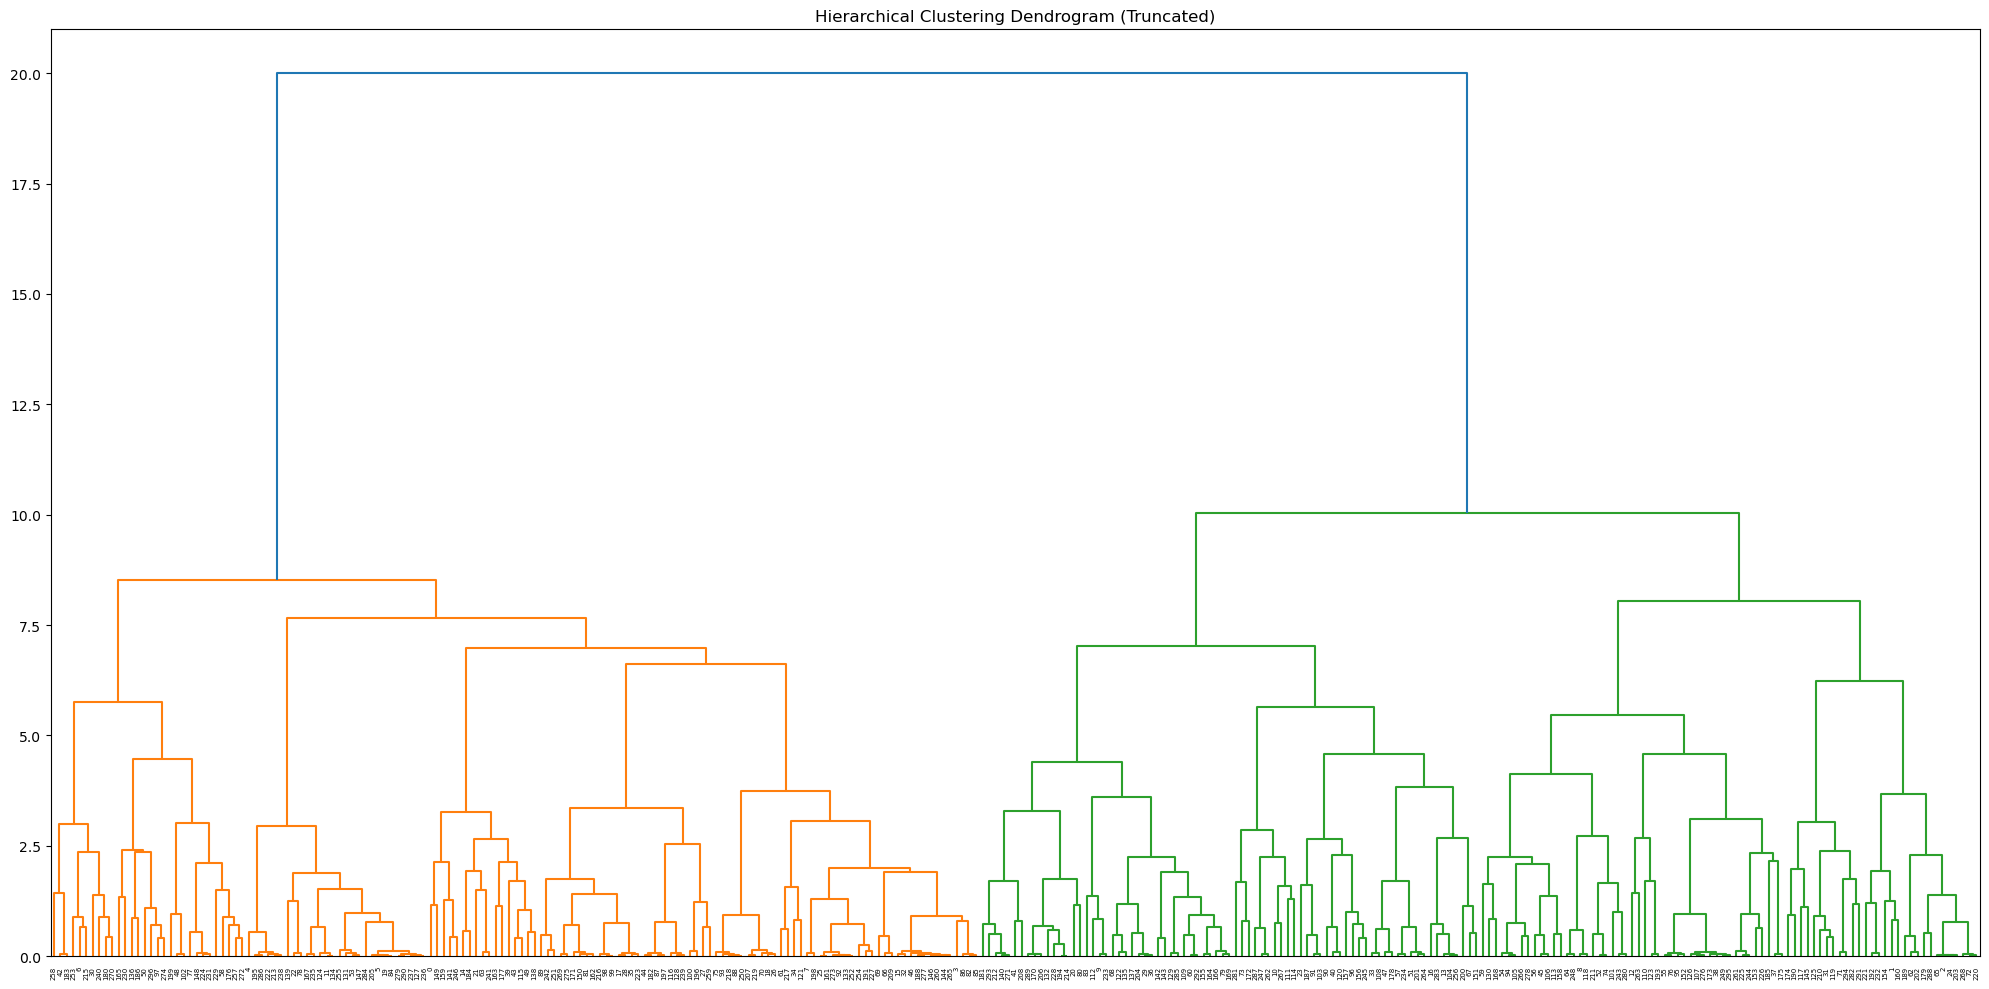

In [6]:
z = linkage(x,method='ward')

plt.figure(figsize=(20,10))
dendrogram(z)
plt.title("Hierarchical Clustering Dendrogram (Truncated)")

plt.tight_layout()
plt.show()

In [7]:
hier = AgglomerativeClustering(n_clusters=2)
df['hier_cluster'] = hier.fit_predict(x)
print("Hierarchical Silhouette Score:", silhouette_score(x, df['hier_cluster']))

Hierarchical Silhouette Score: 0.24232053236461826


In [8]:
print("K-Means vs Target:\n", pd.crosstab(df['kmeans_cluster'], df['num']))
print("Hierarchical vs Target:\n", pd.crosstab(df['hier_cluster'], df['num']))

K-Means vs Target:
 num               0    1
kmeans_cluster          
0               135   23
1                25  114
Hierarchical vs Target:
 num             0    1
hier_cluster          
0              35  119
1             125   18


In [9]:
df.head()

,PC1,PC5,PC6,PC10,PC7,PC9,PC12,PC13,PC8,num,kmeans_cluster,hier_cluster
0,-0.017550,0.292001,0.746005,-0.343690,-0.727584,0.184558,0.350511,0.598685,-0.910318,0,0,1
1,-1.134815,0.174615,0.095826,0.239566,0.764537,-0.343816,-0.552569,-0.677350,-0.511039,1,1,0
2,-1.865945,0.059297,-0.125068,0.854383,-0.099045,-0.041109,0.011509,0.022689,-0.030261,1,1,0
3,0.897661,0.388291,0.411199,0.125395,0.406543,-0.521288,-0.390647,-0.211833,-0.039662,0,0,1
4,1.314315,0.308332,-0.268851,0.029966,-0.274715,0.800398,-0.180443,0.074683,0.190862,0,0,1


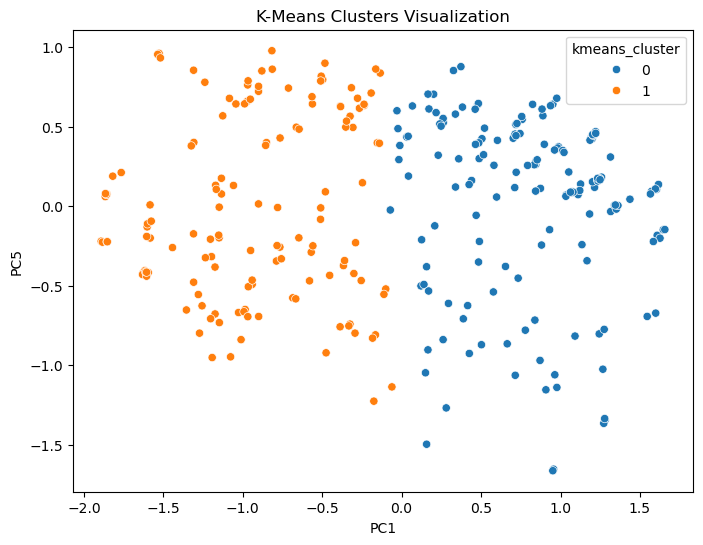

In [10]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=x.iloc[:, 0], y=x.iloc[:, 1], hue=df['kmeans_cluster'])
plt.title('K-Means Clusters Visualization')
plt.show()

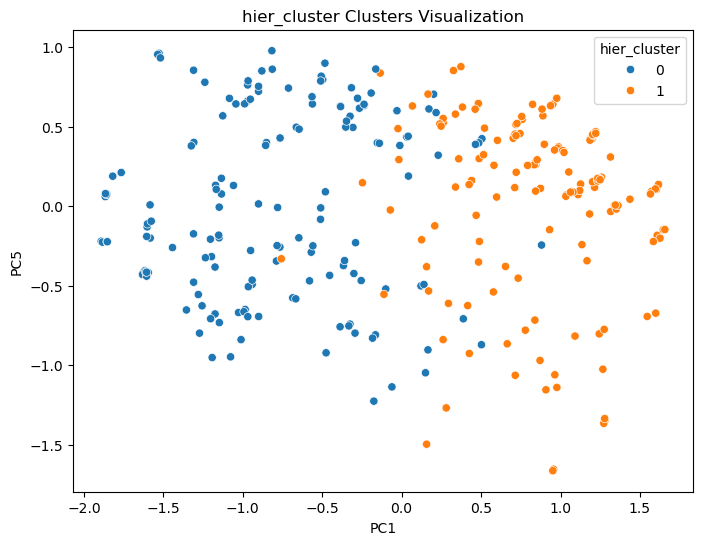

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=x.iloc[:, 0], y=x.iloc[:, 1], hue=df['hier_cluster'])
plt.title('hier_cluster Clusters Visualization')
plt.show()